Let's consider two more clustering algorithms from unsupervised learning - Mean Shift and HAC.

## Mean Shift

Unlike K-Means, in this case we do not need to predetermine the number of clusters, as the algorithm itself does this based on the data, which in some cases is a big plus but it needs to predefine other parameter - bandwidth. Math behind mean shift is more complex so let's start with simple example:

Let's say we have this points:

![](https://i.imgur.com/DqnagXH.png) 

Firstly we choose radius(this is bandwidth), let's say $r=3$. Than we choose some random point, for example lower left point and we consider it as center or circle with radius r. 
![](https://imgur.com/vdqBzcu.png)  
Which points are inside this circle?
![](https://imgur.com/lpy0R6K.png)  
We calculate center of mass. We assign this value to each point so in our case it's just average of point coordinates.
![](https://imgur.com/E0cBug5.png)  
Nowe create a new circle with the same radius for this center of mass
![](https://imgur.com/5CQu221.png)  
We calculate center of mass for this new points and create a new circle
![](https://imgur.com/zIbeDKm.png)  
we continue this process until convex:
![](https://imgur.com/9UYFEfz.png)  


![](https://imgur.com/wpqkbpb.png)  
We don't have new points in circle so this means that we reached to convex and the center of mass we got on the last step is centroid of a cluster for firstly chosen point.

We should do this process for each point. Points with the same centroids are consider as a same cluster. One way to make this algorithm faster is that when we reach convex point, each point that is inside circle just assign to the same cluster and we don't need to do this whole process for this points

In fact we get a better result if each point has different center of mass, let's use this formula for each point to calculate center of mass:

$$ M = \frac{\sum_{i=1}^{n} m_iA_i}{\sum_{i=1}^{n} m_i} $$  

$M$ - center of mass. $n$ - number of points. $A_i$ - $i$th point. $m_i$ - center of mass for $i$th point. It is logical that the closer point to the center of circle should have greater weight than the points that are far from center. In this way the points closer to the center will have a greater influence on the direction of movement of the circle, i.e. the circle will be more localized and we will get more accurate clusters.

To get this we need some function that assigns masses ( it's called __kernel__). One of the most popular kernels is __gauss kernel__. It assigns masses using gaussian(normal) distribution:

![](https://sciences.usca.edu/biology/zelmer/305/norm/stanorm.jpg)  

This is the same logic as we talked before.

We can implement Mean Shift algorithm using `MeanShift` class from `sklearn.cluster` module.

Let's create data using `make_blobs()` function from `sklearn.datasets` module. parameters:  
* `n_samples` - number of points
* `centers` - number of center/clusters or their coordinates
* `n_features` - number of features
* `random_state` - to have same result for several run

This function returns `X` and `y`, in our case we don't need `y` as it's unsupervised learning algorithm but still we can use it for visualisation purposes

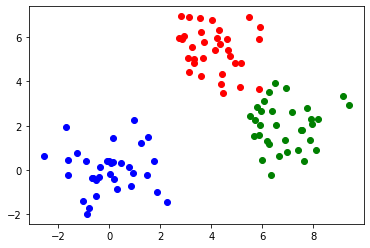

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = np.array([[0, 0], [4, 5], [7, 2]])  # კლასტერების ცენტრები
X, y = make_blobs(n_samples=100, centers=centers, n_features=2, random_state=0)

plt.plot(X[y==0, 0], X[y==0, 1], 'bo', X[y==1, 0], X[y==1, 1], 'ro', X[y==2, 0], X[y==2, 1], 'go')
plt.show()

Red and greed clusters are close to each other and maybe model will get confused with this points. Let's run mean shift algorithm and print generated cluster center using `cluster_centers_` attribute. Men shift from `sklearn` library uses RBF (Radial Basis Function) kernel(not gaussian) and we can do not pass bandwidth, model chooses it regarding to data.

In [2]:
from sklearn.cluster import MeanShift

ms = MeanShift().fit(X)
ms.cluster_centers_

array([[ 6.61718358,  2.0631853 ],
       [ 4.10298085,  5.44110186],
       [ 0.06110439, -0.01455301]])

It's too close to real cenetrs(that we passed to `make_blobs()` function)

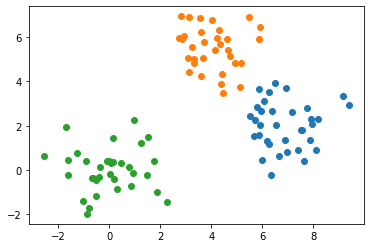

In [3]:
# plt.plot(X[ms.labels_==0, 0], X[ms.labels_==0, 1], 'bo', 
#          X[ms.labels_==1, 0], X[ms.labels_==1, 1], 'ro', 
#          X[ms.labels_==2, 0], X[ms.labels_==2, 1], 'go')
for i in range(len(ms.cluster_centers_)):
    plt.scatter(X[ms.labels_==i, 0], X[ms.labels_==i, 1])
plt.show()

Algorithm missclassified only one point and this point is not clear for even human so it's pretty good result especially because we didn't pass bandwidth parameter.

Let's try different bandwidth values:

In [4]:
ms = MeanShift(bandwidth=100).fit(X)
ms.cluster_centers_

array([[3.62904232, 2.45277867]])

We got one big cluster because our bandwidth is too big(as we said above)

In [5]:
ms = MeanShift(bandwidth=0.5).fit(X)
ms.cluster_centers_

array([[ 0.03311045,  0.26034346],
       [-0.41765253, -0.24891771],
       [ 7.83163538,  2.06867528],
       [ 5.77036476,  2.45691303],
       [ 4.39558552,  5.68297402],
       [ 3.30829029,  4.88229142],
       [ 6.18318326,  3.56045097],
       [ 5.99711486,  1.39615176],
       [ 5.78484592,  1.85495282],
       [ 7.00090999,  0.78796457],
       [ 4.95170737,  4.93134933],
       [ 4.41480987,  3.89318181],
       [ 3.57137359,  6.84839973],
       [ 2.83120418,  5.97489164],
       [ 0.71832979,  0.10133071],
       [ 0.17875079, -0.48102018],
       [-0.916495  , -1.70903234],
       [ 9.27319036,  3.14050372],
       [ 6.71686297,  3.82143739],
       [ 3.66440984,  6.01245073],
       [ 3.35779194,  4.33684776],
       [ 2.98282545,  6.92684307],
       [ 1.38153495,  1.33586931],
       [-1.44149685,  0.62013631],
       [ 8.12663592,  0.92006849],
       [ 7.85683061,  1.34897441],
       [ 7.77179055,  2.82350415],
       [ 7.62523145,  0.39794234],
       [ 7.1666735 ,

We got lots of clusters because our bandwidth is too small(as we said above)

## HAC

HAC (Hierarchical Agglomerative Clustering) - this algorithm works from botton to top. At first we consider each point as seperate clusters and we merge them step by step. We don't need to pass number of clusters to this algorithm

Algorithm:  
1. Each point is seperate cluster
2. We merge two closest clusters
3. We repeat step $2$ until we have only one cluster

___what does it mean 'closest clusters'?___  
We should define distance between clusters:
* single linkage - minimum distance between two points from this clusters(one point from first cluster and second point from the other cluster)
* complete linkage - maximum distance between two points from this clusters(one point from first cluster and second point from the other cluster)
* average linkage - average of distances between two points(we consider average of all pairs of points)
* centroid linkage - distance between centroids
* ward linkage -
$$ L(A, B) = \frac {n_A n_B}{n_A + n_B} (m_A - m_B)^2 $$
$A$ and $B$ - name of clusters, $n_A$, $n_B$ number of elements in each cluster, $m_A$, $m_B$ center of cluster. 

ward linkage is mostly common.
      
___How do we get final clustering result from this one big cluster?___   
We need to create a dendrogram. Is some kind of diagram that has shape of tree and shows us hierarchical dependence between objects. Let's look at example:

Firstly let's generate some points using `make_blobs()` function

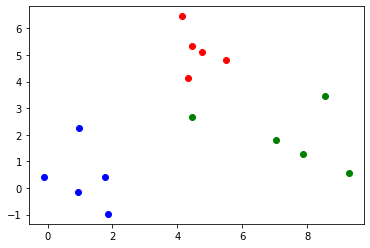

In [6]:
centers = np.array([[0, 0], [4, 5], [7, 2]])  # centers of clusters
X, y = make_blobs(n_samples=15, centers=centers, n_features=2, random_state=0)

plt.plot(X[y==0, 0], X[y==0, 1], 'bo', X[y==1, 0], X[y==1, 1], 'ro', X[y==2, 0], X[y==2, 1], 'go')
plt.show()

We can use `dendrogram()` class from `scipy.cluster.hierarchy` module to create a dendrogram but firstly we need to get one big cluster and we'll use `linkage()` method from the same class for this

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

z = linkage(X, 'ward')
z

array([[ 5.        ,  7.        ,  0.38150146,  2.        ],
       [ 1.        ,  4.        ,  0.98321179,  2.        ],
       [ 6.        ,  8.        ,  0.98905877,  2.        ],
       [10.        , 15.        ,  1.14446255,  3.        ],
       [13.        , 18.        ,  1.35442786,  4.        ],
       [ 3.        , 16.        ,  1.4020422 ,  3.        ],
       [ 9.        , 14.        ,  2.12617245,  2.        ],
       [ 0.        , 19.        ,  2.17169758,  5.        ],
       [11.        , 17.        ,  2.38676063,  3.        ],
       [ 2.        , 23.        ,  2.83255622,  4.        ],
       [20.        , 21.        ,  2.95866309,  5.        ],
       [12.        , 22.        ,  3.2574221 ,  6.        ],
       [24.        , 26.        , 10.20015058, 10.        ],
       [25.        , 27.        , 15.16169329, 15.        ]])

We get two dimensional matrix where each vector has four components: indexes of merged clusters, distance between them and number of points in new cluster. When we merge two clusters, index of new cluster is smallest unused number. If we have 15 data points, their cluster indexes are from $0$ to $14$ and the index of cluster that we get from the very first merge operation is $15$. Using this matrix we canc reate a dendrogram:

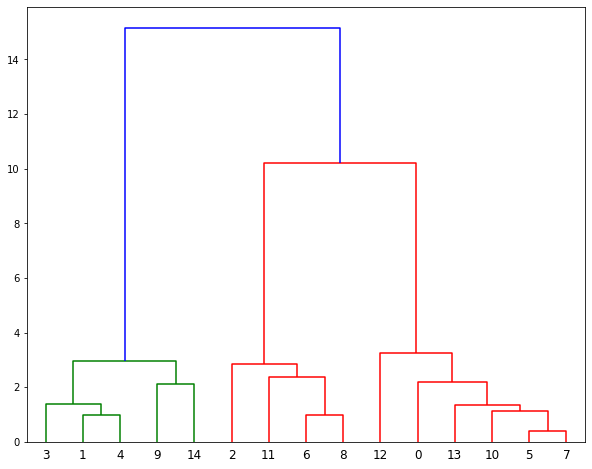

In [8]:
plt.figure(figsize=(10, 8))
dendrogram(z)
plt.show()

Number on $x$ axis are index of our points. height on horizontax axis, so coordinate on $y$ axis means distances between merged clusters.

We know that firstly algorithm merges two closest clusters so if we want to find out the sequence of merging process, we can find the lowest horizontal line and this will be the first merged clusters, in our case clusters with indexes $5$ and $7$.

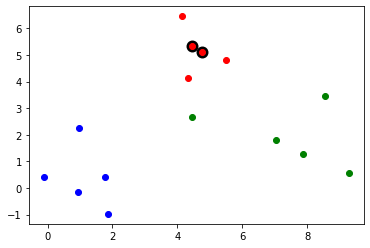

In [11]:
# visualization of points 5 and 7 to make sure that they are the closest ones:
plt.plot(X[y==0, 0], X[y==0, 1], 'bo', X[y==1, 0], X[y==1, 1], 'ro', X[y==2, 0], X[y==2, 1], 'go')
plt.scatter([X[5, 0],  X[7, 0]], [X[5, 1], X[7, 1]], s=80, edgecolors='k', linewidths=3)
plt.show()

cluster creation:  
![](https://imgur.com/n4FjC7b.png)  

Other approach:
We can take maximum depth (`distance_threshold`) and say that if distance is bigger than this threshold, we won't merge clusters. 

In practice if we want to write HAC algorithm `AgglomerativeClustering` class from `sklearn.cluster` module is used more often, we should pass only `n_clusters`(it's $2$ by default) to it or `distance_threshold`

In [12]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters=None, distance_threshold=4).fit(X)
hac.n_clusters_   # let's look how many clusters did it found

3

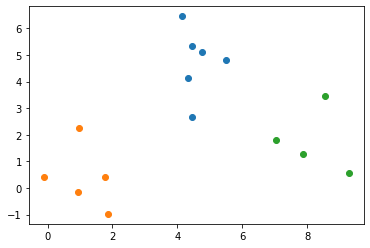

In [13]:
for i in range(hac.n_clusters_):
    plt.scatter(X[hac.labels_==i, 0], X[hac.labels_==i, 1]) 
plt.show()

There is only one missclassified data point. Let's consider bigger dataset with more clusters:

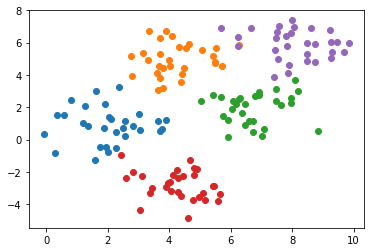

In [14]:
centers = np.array([[2, 1], [4, 5], [7, 2], [4.5, -3], [8, 6]])  # centers of classes
X, y = make_blobs(n_samples=150, centers=centers, n_features=2, random_state=7)

for i in range(5):
    plt.scatter(X[y==i, 0], X[y==i, 1]) 
plt.show()

Let's try max_depth = 5

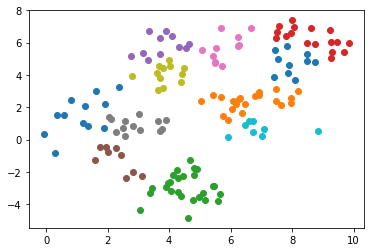

In [15]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=5).fit(X) 

for i in range(hac.n_clusters_):
    plt.scatter(X[hac.labels_==i, 0], X[hac.labels_==i, 1]) 
plt.show()

We got lots of classes, let's try to increase max_depth to $10$

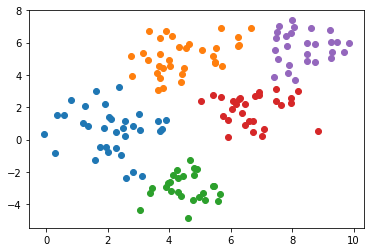

In [16]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=10).fit(X) 

for i in range(hac.n_clusters_):
    plt.scatter(X[hac.labels_==i, 0], X[hac.labels_==i, 1]) 
plt.show()

We got much better result. Let's try $3$ clusters:

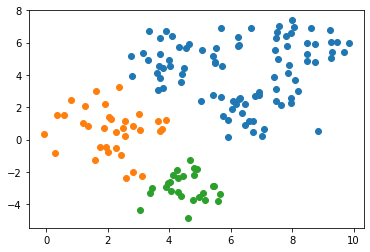

In [17]:
hac = AgglomerativeClustering(n_clusters=3).fit(X) 

for i in range(hac.n_clusters_):
    plt.scatter(X[hac.labels_==i, 0], X[hac.labels_==i, 1]) 
plt.show()

Previous one was better. 

Bad thing about HAC is that it's much slower than mean shift(mean shift is slower tham k-means)